In [1]:
import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# DIABETES - Dużo przypadków i zmiennych

In [2]:
df = pd.read_csv('diabetes.csv')
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values
results = {}

In [3]:
seed = 0
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)

Shape of X_train: (537, 8)
Shape of X_test: (231, 8)


In [4]:
def confusion_mat(Y_pred, Y_test):
    plt.figure()
    sns.set(font_scale=1.5)
    cm = confusion_matrix(Y_pred, Y_test)
    sns.heatmap(cm, annot=True, fmt='g')
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

### AdaBoost

Accuracy of the result is: 0.7619047619047619


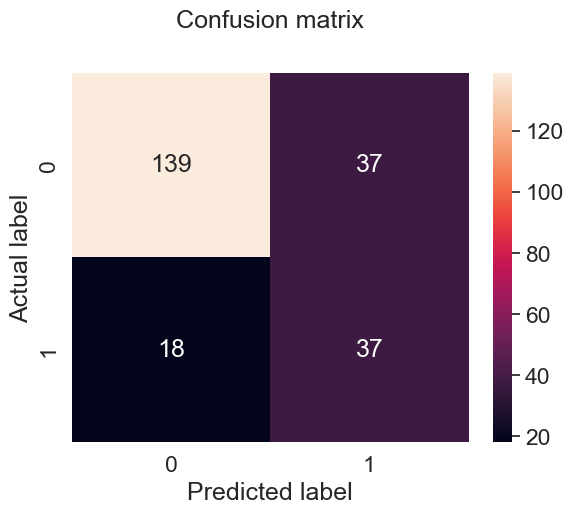

In [5]:
clf = AdaBoostClassifier(n_estimators=100, random_state=1)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
results['AdaBoost'] = np.mean(predicted == y_test)
print(f'Accuracy of the result is: {results["AdaBoost"]}')

confusion_mat(predicted, y_test)

### GBM

Accuracy of the result is: 0.7835497835497836


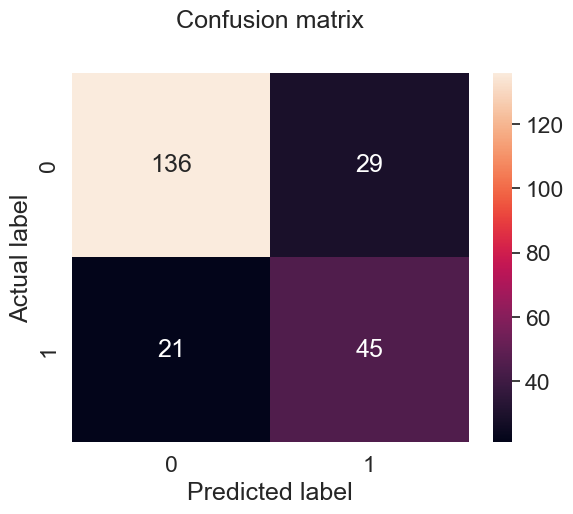

In [6]:
clf = GradientBoostingClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
results['GBM'] = np.mean(predicted == y_test)
print(f'Accuracy of the result is: {results["GBM"]}')

confusion_mat(predicted, y_test)

### XGBoost

Accuracy of the result is: 0.7748917748917749


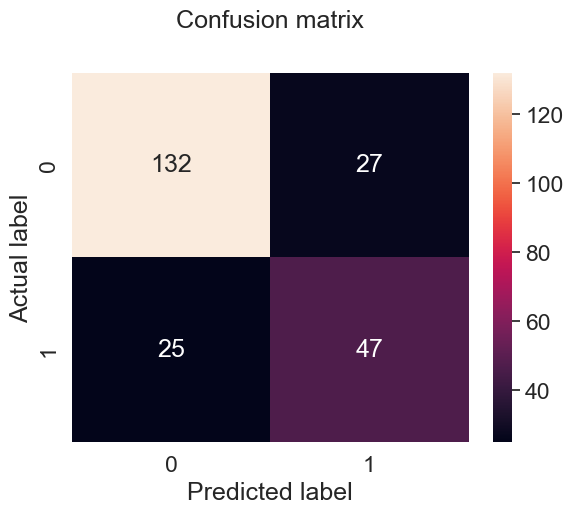

In [7]:
clf = XGBClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
results['XGBoost'] = np.mean(predicted == y_test)
print(f'Accuracy of the result is: {results["XGBoost"]}')

confusion_mat(predicted, y_test)

### Light GMB

[LightGBM] [Info] Number of positive: 194, number of negative: 343
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000405 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 614
[LightGBM] [Info] Number of data points in the train set: 537, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.361266 -> initscore=-0.569872
[LightGBM] [Info] Start training from score -0.569872
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


C:\Users\Arek\PycharmProjects\Machine-Learning\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


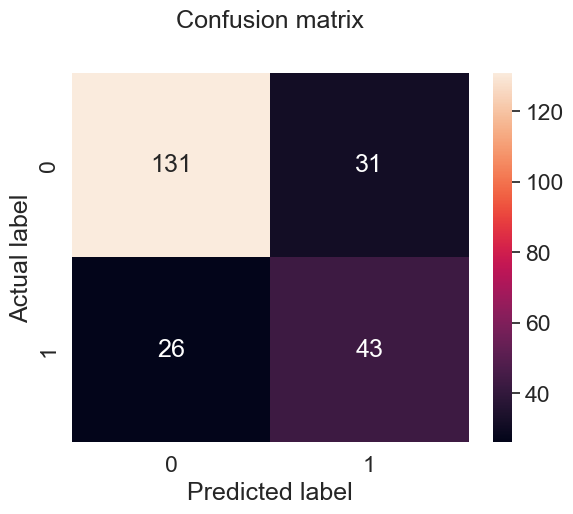

In [8]:
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
results['LightGMB'] = np.mean(predicted == y_test)
print(f'Accuracy of the result is: {results["LightGMB"]}')

confusion_mat(predicted, y_test)

### Cat Boost

Learning rate set to 0.065258
0:	learn: 0.6757016	total: 114ms	remaining: 11.3s
1:	learn: 0.6609356	total: 115ms	remaining: 5.64s
2:	learn: 0.6478453	total: 117ms	remaining: 3.77s
3:	learn: 0.6333980	total: 118ms	remaining: 2.83s
4:	learn: 0.6203836	total: 119ms	remaining: 2.27s
5:	learn: 0.6100257	total: 121ms	remaining: 1.89s
6:	learn: 0.5988650	total: 122ms	remaining: 1.62s
7:	learn: 0.5901353	total: 123ms	remaining: 1.42s
8:	learn: 0.5805091	total: 125ms	remaining: 1.26s
9:	learn: 0.5719415	total: 126ms	remaining: 1.14s
10:	learn: 0.5634320	total: 128ms	remaining: 1.03s
11:	learn: 0.5566108	total: 129ms	remaining: 947ms
12:	learn: 0.5490646	total: 130ms	remaining: 873ms
13:	learn: 0.5423058	total: 132ms	remaining: 809ms
14:	learn: 0.5362326	total: 133ms	remaining: 753ms
15:	learn: 0.5295507	total: 134ms	remaining: 704ms
16:	learn: 0.5234072	total: 135ms	remaining: 661ms
17:	learn: 0.5182781	total: 137ms	remaining: 623ms
18:	learn: 0.5137260	total: 138ms	remaining: 588ms
19:	learn: 

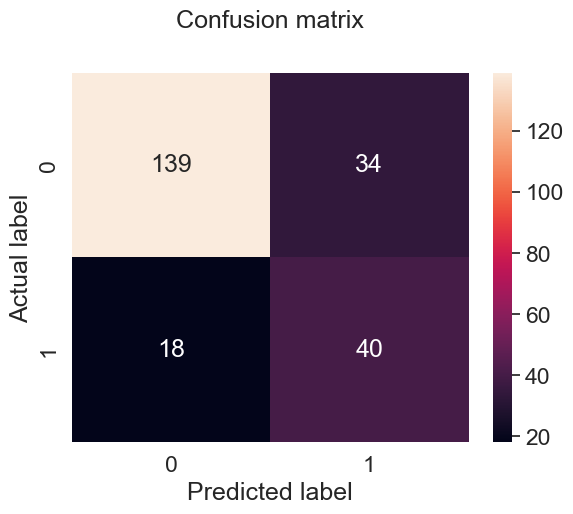

In [9]:
clf = CatBoostClassifier(iterations=100)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
results['CatBoost'] = np.mean(predicted == y_test)
print(f'Accuracy of the result is: {results["CatBoost"]}')

confusion_mat(predicted, y_test)

In [15]:
def make_table(results):
    df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
    df = df.round(3)
    df = df.transpose()
    fig, ax = plt.subplots(figsize=(8, 2))
    ax.axis('off')
    min_val = df.iloc[0].min()
    max_val = df.iloc[0].max()
    cell_colors = []
    for val in df.iloc[0]:
        if val == max_val:
            cell_colors.append('lightgreen')
        elif val == min_val:
            cell_colors.append('lightcoral')
        else:
            cell_colors.append('white')
    table = ax.table(cellText=df.values,
                     colLabels=df.columns,
                     rowLabels=df.index,
                     cellColours=[cell_colors],
                     loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1, 2)
    plt.show()

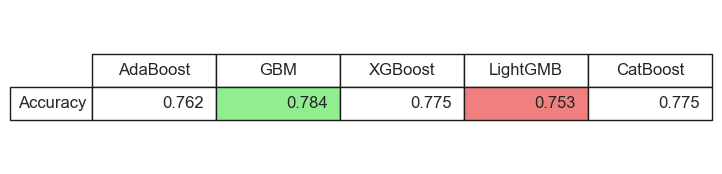

In [16]:
make_table(results)